<a href="https://colab.research.google.com/github/rubengamarro/practicas_aprendizaje_no_supervisado/blob/main/1_Agrupamiento_no_supervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EJERCICIO 1

In [104]:
from PIL import Image
import numpy as np
# Cargar imagen
img = Image.open('BaboonSOFM.tif')
# Convertir objeto imagen a array numpy
imagen = np.asarray(img)
#Obtenemos número de filas, columnas y canales de color
fil = imagen.shape[0]
col = imagen.shape[1]
canales = imagen.shape[2]
#Aplanamos array de imagen para pasar a una lista de filxcol muestras con
#tantos rasgos como canales tenga la imagen
X = imagen.reshape((fil*col, canales))

**Apartado a**

In [105]:
from sklearn.cluster import KMeans

#init='randon' especifica el algoritmo "clásico" de K-medias
km = KMeans(n_clusters=8,
            init='random',
            n_init='auto',
            random_state=0)
predicciones = km.fit_predict(X)

**Apartado b**

In [106]:
imagenComp = np.zeros((fil,col,canales))
cont=0
for idx_f in np.arange(fil):
  for idx_c in np.arange(col):
    imagenComp[idx_f, idx_c, :] = km.cluster_centers_[predicciones[cont]]
    cont=cont+1

**Apartado c**

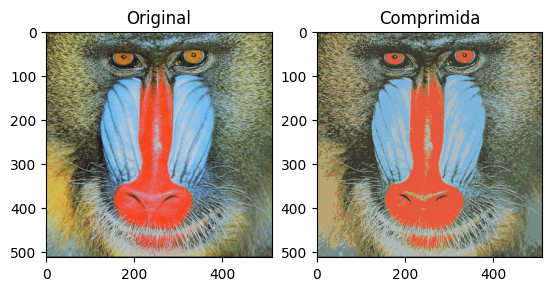

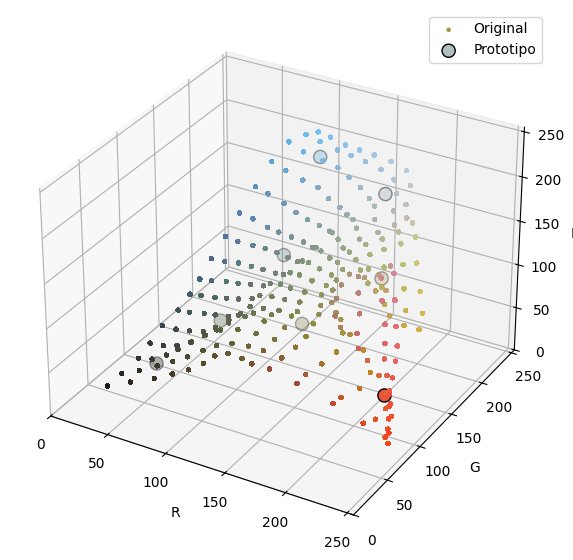

In [107]:
import matplotlib.pyplot as plt
#Dibujamos la imagen original y la comprimida
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(imagen)
ax1.set_title('Original')
#Debemos pasar a entero para que se dibuje correctamente
ax2.imshow(imagenComp.astype(np.int32))
ax2.set_title('Comprimida')
plt.show()

fig = plt.figure(figsize = (7, 7))
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], marker='.', color=X/255, label='Original')
ax.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],
km.cluster_centers_[:,2], marker='o', edgecolor='k',
color=km.cluster_centers_/255, s=90,label='Prototipo')
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
ax.legend()
ax.axes.set_xlim3d(left=0, right=255)
ax.axes.set_ylim3d(bottom=0, top=255)
ax.axes.set_zlim3d(bottom=0, top=255)
plt.show()

**Apartado d**

En la imagen comprimida se utilizan 8 colores distintos, que se corresponden a los 8 centroides que le hemos pedido a k-medias.

#EJERCICIO 2

**Apartado a**

In [108]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://github.com/rubengamarro/practicas_aprendizaje_no_supervisado/raw/main/data/urbanGB.csv', header=None)
df

,0,1
0,-0.310990,53.7802
1,-3.112550,55.8706
2,-0.088533,51.3806
3,-0.326795,51.4476
4,-3.946530,51.6594
...,...,...
360172,-0.557803,53.2197
360173,-1.748430,52.4872
360174,-0.128844,51.5126
360175,-1.885640,52.4490


In [109]:
from sklearn.preprocessing import StandardScaler

X_accidentes = df.values

escaladorEstandar = StandardScaler()
X_accidentes_std = escaladorEstandar.fit_transform(X_accidentes)

df_accidentes_std = pd.DataFrame(X_accidentes_std, columns=df.columns)

Text(0, 0.5, 'X1')

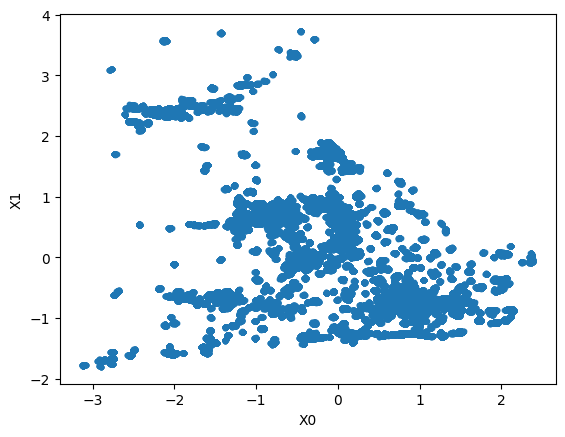

In [110]:
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(X_accidentes_std[:,0], X_accidentes_std[:,1], s=10)
plt.xlabel("X0")
plt.ylabel("X1")

In [111]:
km_plus = KMeans(n_clusters=5,
            init='k-means++',
            n_init='auto',
            random_state=0)
predicciones = km_plus.fit_predict(X_accidentes_std)
predicciones

array([4, 0, 1, ..., 1, 4, 0], dtype=int32)

In [112]:
from numpy import unique
from matplotlib import cm

def dibujaMuestras2D(X, predicciones, centroides = []):
  #Obtenemos lista de identificadores de grupos
  grupos = unique(predicciones)
  #Definimos los colores para las muestras de cada grupo

  colores = [plt.cm.tab20(each) for each in np.linspace(0, 1, len(grupos))]

  #Procesamos muestras grupo a grupo:
  for grupo, color in zip(grupos, colores):
    etiqueta = "Grupo " + str(grupo)
    plt.scatter(X[predicciones==grupo, 0], X[predicciones==grupo, 1], s=20,
                  color=color, label=etiqueta)

  if len(centroides)!= 0:
    #Dibujamos centroides:
    plt.scatter(centroides[:, 0], centroides[:, 1],
                c="r", marker = "X", label="Centroides",
                s=200)

  #Dibujamos leyenda, etiquetas...
  plt.xlabel("X0")
  plt.ylabel("X1")
  plt.legend()
  plt.grid()
  plt.tight_layout()
  plt.show()

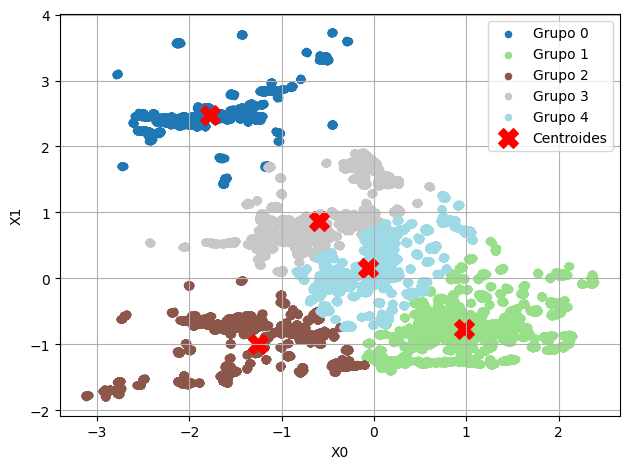

In [113]:
dibujaMuestras2D(X_accidentes_std, predicciones, km_plus.cluster_centers_)

Los distintos centroides serán las nuevas comisarías y los puntos de cada color son los distintos accidentes provocados en las 5 zonas distintas.

**Apartado b**